In [1]:
import numpy as np
import scipy
import librosa
import IPython
import matplotlib.pyplot as plt
import librosa.display

In [2]:
infile = 'test_noise.wav'
outfile = 'filtered_file.wav'
noisefile = 'noisefile.wav'
sample_noise ='noise_sample.wav' 

In [3]:
print("Input noisy test_file:")
IPython.display.display(IPython.display.Audio(infile))

print("Noise file extracted from the test_noise using audacity:")
IPython.display.display(IPython.display.Audio(noisefile))

print("Filtered_file extracted from the test_noise using audacity:")
IPython.display.display(IPython.display.Audio(outfile))

print("Sample of noise generated from the test_noise using audacity:")
IPython.display.display(IPython.display.Audio(sample_noise))

Input noisy test_file:


Noise file extracted from the test_noise using audacity:


Filtered_file extracted from the test_noise using audacity:


Sample of noise generated from the test_noise using audacity:


In [4]:
print ('input file', infile)
w, sr = librosa.load( infile, sr=None, mono=True) 
#print(sr)
#print(w)
s= librosa.stft(w)    # Short-time Fourier transform
ss= np.abs(s)         # get magnitude
#print(ss)
#print(w.shape)
print(ss.shape)
angle= np.angle(s)    # get phase
b=np.exp(1.0j* angle) # use this phase information when Inverse Transform

input file test_noise.wav
(1025, 126)


In [5]:
# load noise only file, stft, and get mean
print ('noise file', sample_noise)
nw, nsr = librosa.load( sample_noise, sr=None, mono=True)
ns= librosa.stft(nw) 
nss= np.abs(ns)
mns= np.mean(nss, axis=1) # get mean
print(nss.shape)

noise file noise_sample.wav
(1025, 21)


In [6]:
# subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
sa= ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
sa0= sa * b  # apply phase information
y= librosa.istft(sa0) # back to time domain signal

In [7]:
import scipy
from scipy import io
from scipy.io import wavfile

In [8]:
# save as a wav file
wavfile.write(outfile, sr, (y * 32768).astype(np.int16)) # save signed 16-bit WAV format
print ('write wav', outfile)
IPython.display.Audio(outfile)

write wav filtered_file.wav


Waveform of Input test file:


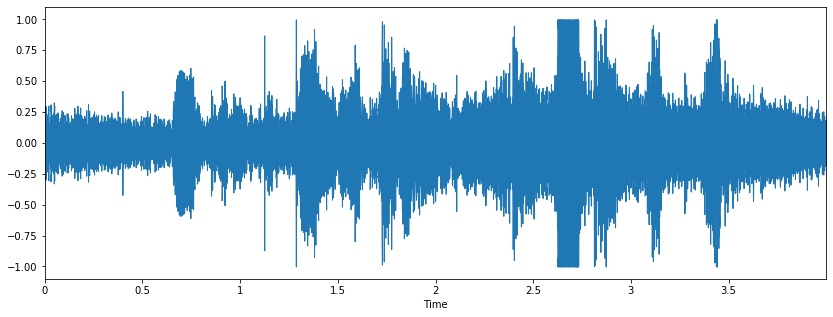

In [9]:
#Plot the signal:
print("Waveform of Input test file:")
plt.figure(figsize=(14, 5))
librosa.display.waveplot(w, sr=sr)

Waveform of the file after spectral filtering:


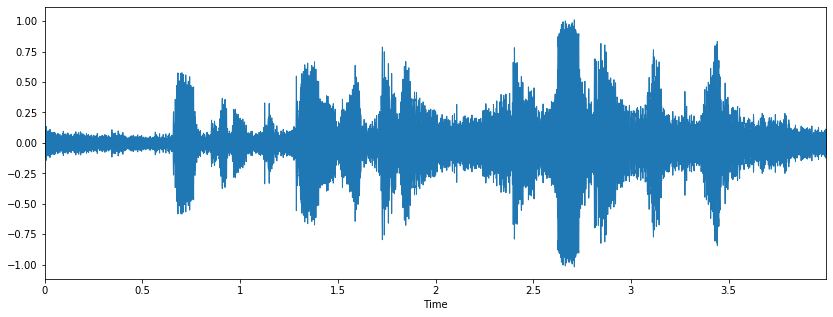

In [10]:
#Plot the signal:
print("Waveform of the file after spectral filtering:")
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)